In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Assuming your data is stored in a CSV file named "lung_cancer_data.csv"
data = pd.read_csv("lungcancer.csv")

# Remove unnecessary attributes (Name and Surname) if they are not relevant for the classification task
data = data.drop(["Name", "Surname"], axis=1)

# Split the data into input features (X) and target variable (y)
X = data.drop("Result", axis=1)
y = data["Result"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Initialize the KNN classifier with the desired number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=3)  # You can change the value of k as per your preference

# Train the classifier using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [4]:


# Use the trained classifier to make predictions on the test data
y_pred = knn.predict(X_test)



In [5]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


Confusion Matrix:
[[8 0]
 [1 3]]


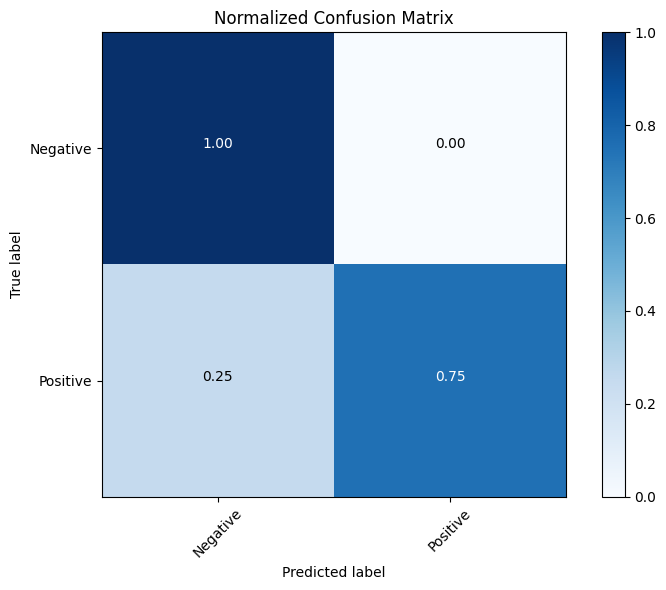

Accuracy: 0.9166666666666666


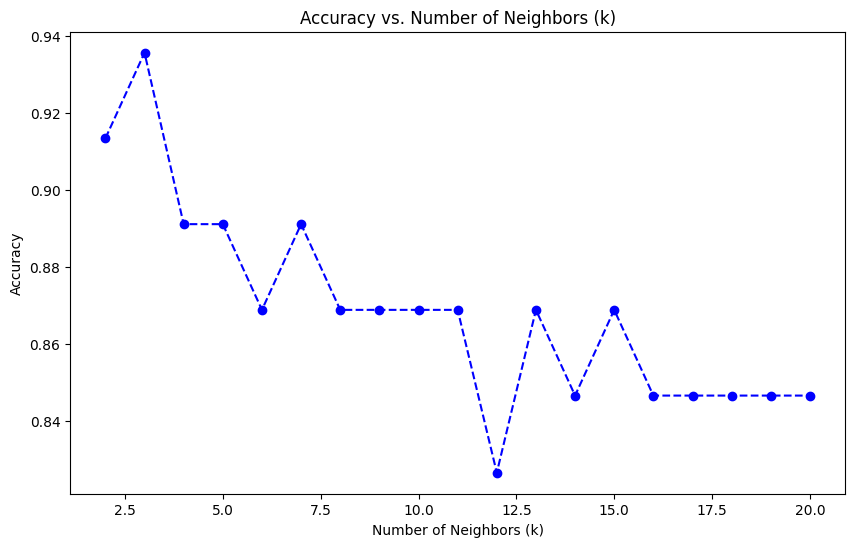

Optimal value of k: 3


In [6]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    title = 'Confusion Matrix'
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized ' + title

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(y_test, y_pred, classes=["Negative", "Positive"], normalize=True)  # Adjust classes accordingly
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the graph to find the optimum value of k
k_values = list(range(2, 21))  # You can adjust the range as needed
accuracy_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_values.append(scores.mean())

# Plot the accuracy values for different k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='dashed', color='blue')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

# Find the optimum value of k
optimal_k = k_values[accuracy_values.index(max(accuracy_values))]
print("Optimal value of k:", optimal_k)
